<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:5- Auto ARIMA, SARIMA and SARIMAX </center></h1></u>

Hello everyone and welcome back to the 5th Assignment of this module.

![](https://c.tenor.com/FjUd6NvVRnMAAAAC/welcome-back-minions.gif)

In this assignment you will be implementing Auto ARIMA, SARIMA and SARIMAX

<h2><u>Table of Contents:</h2></u>

1. Auto Arima<br>
2. Interpreting residual plots in ARIMA model<br>
3. Automatically building SARIMA model<br>
4. Building SARIMAX Model with exogenous variable<br>


<h2><u>Auto ARIMA</h2></u>

You learned how to manually design an ARIMA model in the last assignment.

In industrial settings, however, you will be given a large number of time series to forecast and the forecasting procedure will be repeated on a regular basis.
As a result, we'll need a mechanism to automate the process of choosing the best model.
<br>
<br>Auto ARIMA employs a stepwise strategy to find the optimal model with the lowest AIC among many combinations of p,d,q parameters. The Akaike information criterion (AIC) is a predictor of prediction error and thus relative model quality for a given set of data. We are going to look at this topic in further assignments.

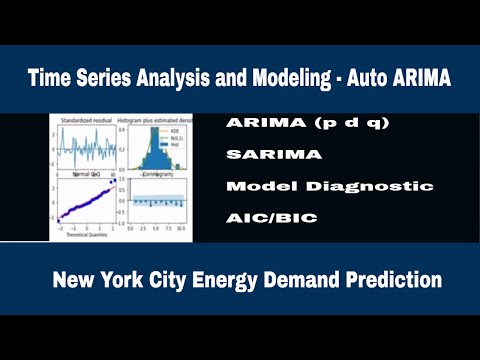

In [5]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('MngVV_4l9Po', width=700, height=400)

Lets begin with the implementation of Auto ARIMA without wasting any time.
Start by importing the necessary libraries.

* ARIMA: to implement ARIMA model
* pmdarima: to implement Auto ARIMA, https://pypi.org/project/pmdarima/
* numpy: for array and matrix operations
* pandas: for storing and analysing data
* matplotlib: plotting graphs

In [1]:
#!pip install --upgrade numpy
!pip install --upgrade --force-reinstall pmdarima
!pip uninstall numpy pmdarima -y
!pip install numpy==1.23.5 pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 920.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8

Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Successfully uninstalled numpy-2.2.5
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 117.4 MB/s eta 0:00:00
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albumentations 2

In [2]:
#import the mentioned libraries
from statsmodels.tsa.arima_model import ARIMA
#!pip install pmdarima
#import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [3]:
# import drive from google.colab
import google.colab.drive as drive

# mount the drive
drive.mount('/content/drive')


Mounted at /content/drive


Next, load the dataset using read_csv method of pandas in the df variable.

Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1pr6bZ7cyFiwEa6qra73f59eHfQxij6Rc/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has one column having values recorded on increasing timescale. plot the dataset to visualize it.

,x
0,88
1,84
2,85
3,85
4,84


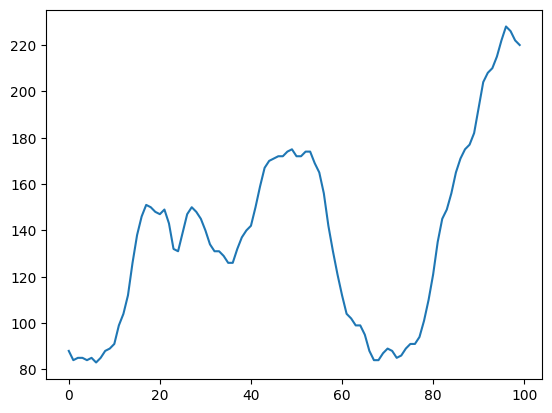

In [4]:
# copy the dataset path
path = '/content/time_series.csv'

# read the data
df = pd.read_csv(path)

# plot the data
plt.plot(df)

# display top 5 rows
df.head()


The data has now been loaded. The data is a non stationary data. Next you will build the auto ARIMA model using the pm.auto_arima function. Various parameters like start_p, start_q,d, etc. have been set.
* **df:** the dataframe
* **start_p:** The starting value of p (set 1)
* **start_q:** The starting value of q (set 1)
* **test:** Type of unit root test to use in order to detect stationarity (we will pass 'adf')
* **max_p:** The maximum value of p, inclusive (set 3)
* **max_q:** The maximum value of q, inclusive (set 3)
* **m:** refers to the number of periods in each season (set 1 i.e. non-seasonal)
* **d:** The order of first-differencing. If None (by default), the value will automatically be selected based on the results of the test. (set to None)
* **seasonal:** Whether to fit a seasonal ARIMA. (set to False)
* **start_P:** The starting value of P, the order of the auto-regressive portion of the seasonal model.(set to 0)
* **D:** The order of the seasonal differencing.(set to 0)
* **trace:** Whether to print status on the fits.(set to True)
* **error_action:** controls the error-handling behavior (set to ignore)
* **suppress_warnings:** If suppress_warnings is True, all of the warnings coming from ARIMA will be squelched. (set to True)
* **stepwise:** Whether to use the stepwise algorithm (set to True)

Know about all the parameters at: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html. Print the model summary

In [5]:
# First uninstall existing packages
!pip uninstall numpy pmdarima -y

# Then reinstall compatible versions
!pip install numpy==1.23.5 pmdarima

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 

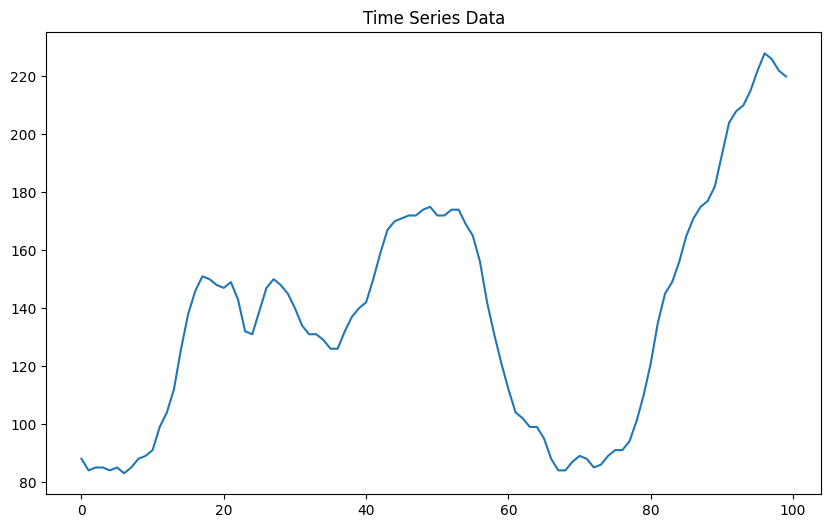

    x
0  88
1  84
2  85
3  85
4  84
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.965 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -252.732
Date:                Mon, 28 Apr 2025   AIC                            511.465
Time:                        22:07:50   BIC                            519.220
Sample:                             0   HQIC                           514.601
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2579      0.103      2.510      0.012       0.056      

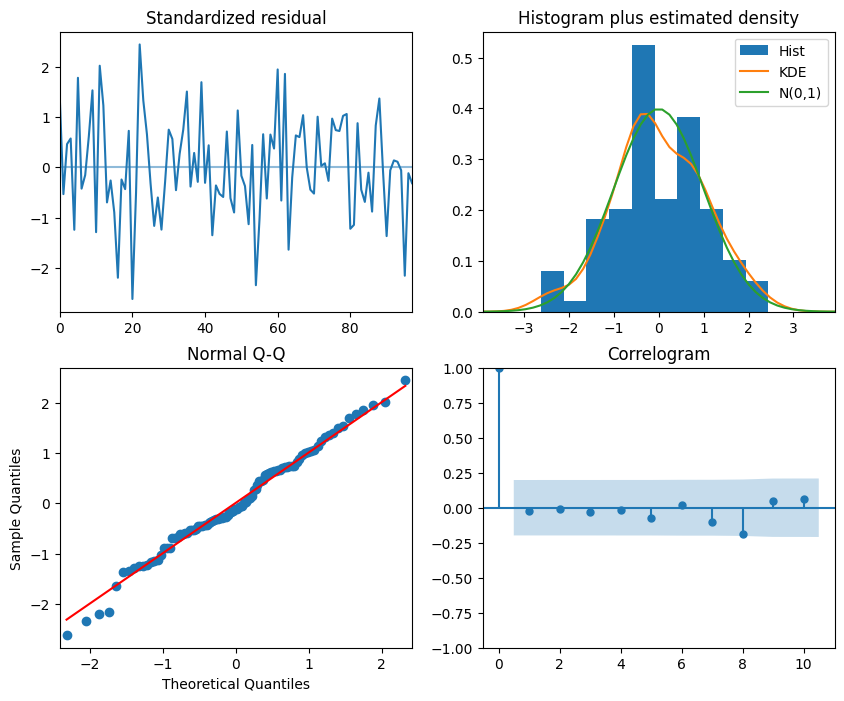

In [1]:
# Import required libraries
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
path = '/content/time_series.csv'
df = pd.read_csv(path)

# Ensure the data is in the right format (assuming single column time series)
# If your data has a date column, set it as index:
# df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Time Series Data')
plt.show()

# Display first 5 rows
print(df.head())

# Fit auto-ARIMA model
model = pm.auto_arima(
    df.values,  # Pass numpy array of values
    start_p=1,
    start_q=1,
    test='adf',
    max_p=3,
    max_q=3,
    m=1,  # Non-seasonal data
    d=None,  # Let model determine differencing
    seasonal=False,  # No seasonality
    start_P=0,
    D=0,  # Seasonal differencing
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Print model summary
print(model.summary())

# Plot diagnostics
model.plot_diagnostics(figsize=(10, 8))
plt.show()

<h2><u>Interpreting residual plots in ARIMA model</h2></u>

Let’s review the residual plots using plot_diagnostics function.

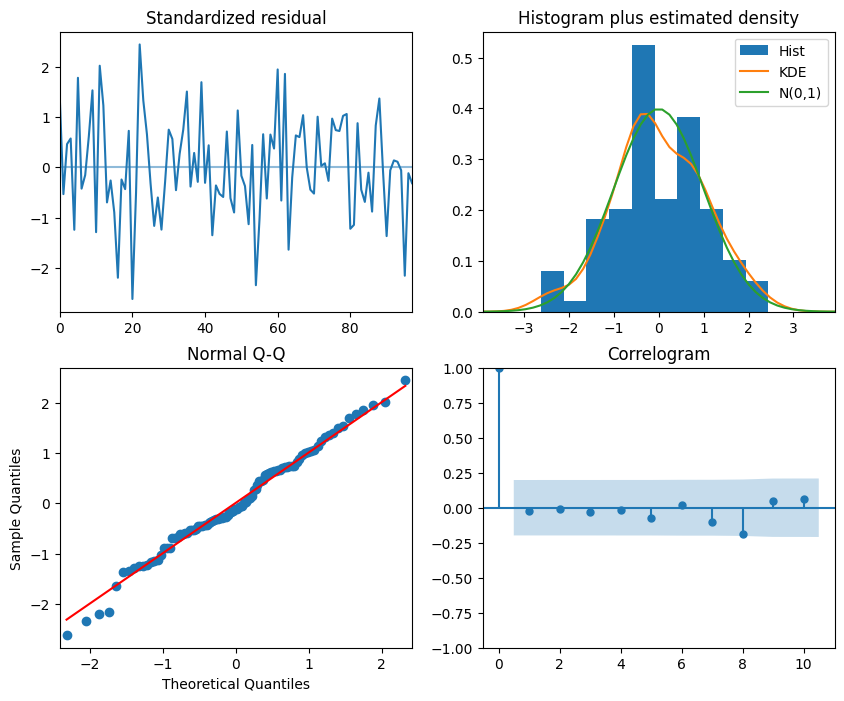

In [2]:
# plot the diagnostics
model.plot_diagnostics(figsize=(10, 8))
plt.show()


So, how should the plot diagnostics be interpreted?

<u>**Standardized residuals:**</u> The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

<u>**Histogram and estimated density:**</u> The density diagram on the top right suggests a normal distribution with a mean of zero.

<u>**Normal Q-Q:**</u> The red line should be completely aligned with all of the dots. Any large variances would indicate a skewed distribution.

<u>**Correlogram:**</u> The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn't explained by the model.


Lets now forecast the series for 24 periods. Predict the data using predict function. Arrange the indexes for the forecasted data starting from the length of original data upto the extended number of periods. Next make the pandas series for forecasted data, lower and upper series of confidence area. Next plot the data,forecasted data and confidence area.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.040 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


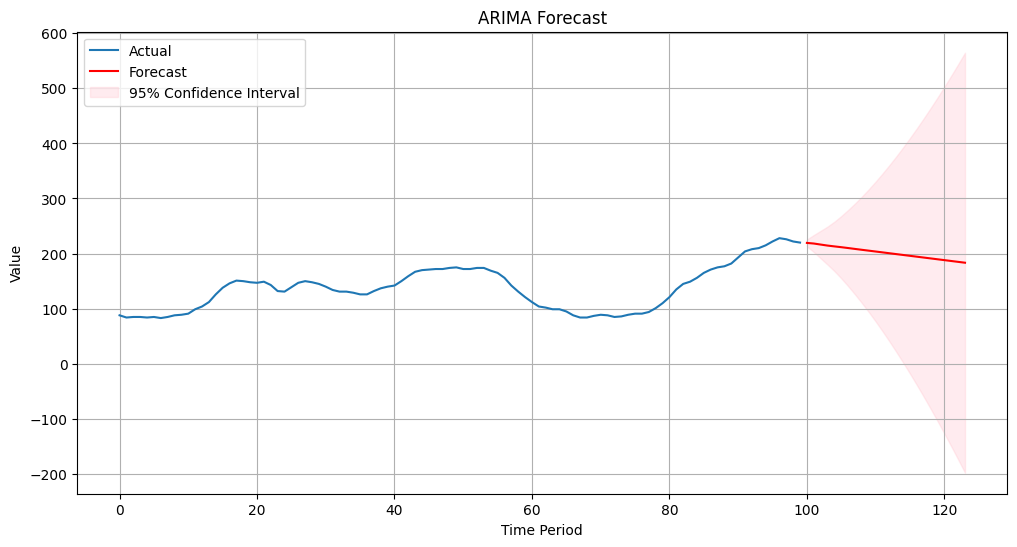

In [3]:
# Import required libraries
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
path = '/content/time_series.csv'
df = pd.read_csv(path)

# Convert to pandas Series if needed (assuming single column)
if len(df.columns) == 1:
    series = df.iloc[:, 0]
elif 'Date' in df.columns:
    series = df.set_index('Date').iloc[:, 0]
else:
    series = df.iloc[:, 1]  # Assuming second column is values

# Fit auto-ARIMA model
model = pm.auto_arima(
    series,
    start_p=1,
    start_q=1,
    test='adf',
    max_p=3,
    max_q=3,
    m=1,
    d=None,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Forecast - initialize number of periods as 24
n_periods = 24
forecast, conf_int = model.predict(
    n_periods=n_periods,
    return_conf_int=True
)

# Initialize indexes of forecast data
last_date = series.index[-1] if hasattr(series.index, 'dtype') else len(series)
forecast_index = pd.RangeIndex(
    start=last_date + 1,
    stop=last_date + n_periods + 1
)

# Make series for plotting
forecast_series = pd.Series(forecast, index=forecast_index)
lower_series = pd.Series(conf_int[:, 0], index=forecast_index)
upper_series = pd.Series(conf_int[:, 1], index=forecast_index)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(series, label='Actual')  # Original data
plt.plot(forecast_series, color='red', label='Forecast')  # Forecasted data

# Fill confidence area
plt.fill_between(
    forecast_index,
    lower_series,
    upper_series,
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

# Formatting
plt.title('ARIMA Forecast')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

<h2><u>Automatically building SARIMA model</h2></u>

The issue with the basic ARIMA model is that it does not account for seasonality. If your time series has defined seasonality, SARIMA, which uses seasonal differencing, is the way to go.

Seasonal differencing is similar to ordinary differencing, except that instead of subtracting consecutive terms, the value from the prior season is subtracted.

![](https://miro.medium.com/max/1400/1*yxe5Sf5JSAROq-UVgMLtmA.png)

As a result, the model will be written as SARIMA(p,d,q)(P,D,Q)m, where P, D, and Q are the SAR, order of seasonal differencing, and SMA terms, respectively, and'm' is the time series frequency.

Enforce D=1 for a particular frequency 'm' if your model has well-defined seasonal trends.

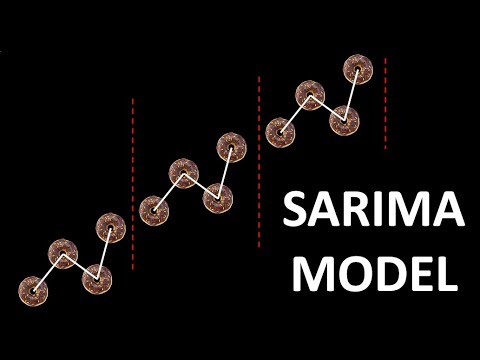

In [6]:
## Refer video
YouTubeVideo('WjeGUs6mzXg', width=700, height=400)

Here are some pointers on how to construct a SARIMA model:

Set the model parameters in such a way that D never surpasses one. And the total difference 'd + D' is never greater than two. If your model incorporates seasonal components, try to preserve only SAR or SMA terms.

## Refer the below video for learning to build SARIMA model manually

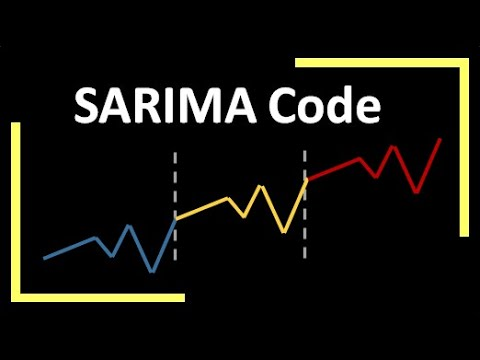

In [7]:
## Refer video
YouTubeVideo('Al8m6K_stfA', width=700, height=400)

Let's create a SARIMA model using the drug sales dataset 'a10'. Start by reading and loading the data. Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1sAKHGC9zH2xape1cLqBT4F7NLpT6eq1X/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has two columns date and values. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. index_cols attribute is set to 0 which specifies Column(s) to use as the row labels of the DataFrame, either given as string name or column index.

In [8]:
#get dataset path
path = '/content/a10.csv'


#read data using read_csv
df = pd.read_csv(path)
#plot the data
df = pd.read_csv(path)
df.head()


,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


The data is highly non stationary as it has an increasing trend as well as seasonality. <br><br>
Next we will plot the normally differenced data and seasonally differenced data for noticing the difference. Pass the value 1 in diff() function for usual differencing whereas pass 12 in diff() for seasonal differencing as the seasonality returns after 12 months.

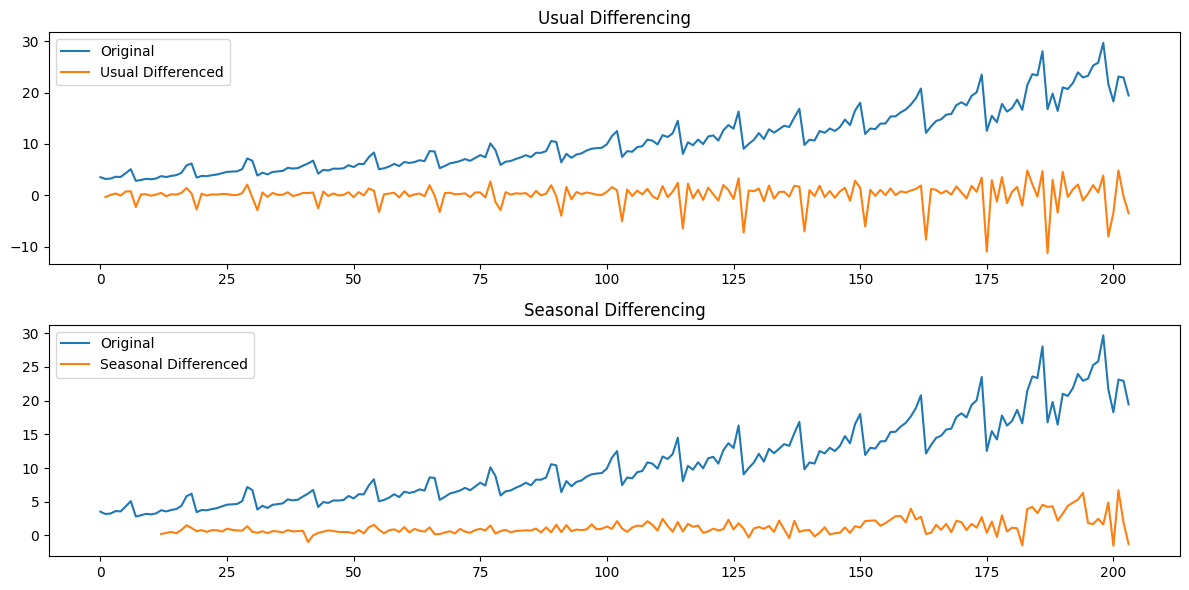

Text(0.5, 0.98, 'Usual Differencing vs Seasonal Differencing')

<Figure size 640x480 with 0 Axes>

In [9]:
# create subplots (2,1)
plt.figure(figsize=(12, 6))

# Usual Differencing
# plot the original series on axis 0
plt.subplot(2, 1, 1)
plt.plot(df['value'], label='Original')  # Changed 'values' to 'value'

# plot a single differentiated data on axis 0
plt.plot(df['value'].diff(), label='Usual Differenced')  # Changed 'values' to 'value'

# set the title
plt.title('Usual Differencing')

# set the legend
plt.legend()

# Seasonal Differencing
# plot the original series on axis 1
plt.subplot(2, 1, 2)
plt.plot(df['value'], label='Original')  # Changed 'values' to 'value'

# plot a seasonal differentiated data (pass 12 in diff()) on axis 1
plt.plot(df['value'].diff(12), label='Seasonal Differenced')  # Changed 'values' to 'value'

# set the title
plt.title('Seasonal Differencing')

# set the legend
plt.legend()

# show the plot
plt.tight_layout()
plt.show()

# add super title
plt.suptitle('Usual Differencing vs Seasonal Differencing')

After applying standard differencing, the seasonal spikes are readily visible (lag 1). After seasonal differencing, however, it is corrected.<br><br>

Let’s build the SARIMA model using pmdarima‘s auto_arima(). To do that, you need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [10]:
!pip3 install pyramid-arima
#import pmdarima

# Seasonal - fit stepwise auto-ARIMA
# create the sarima model (
sarima_model = pm.auto_arima(
    df['value'],
    start_p=1,
    start_q=1,
    test='adf',
    max_p=3,
    max_q=3,
    m=12,
    d=None,
    seasonal=True,
    start_P=0,
    D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
#pass the data,start_p,start_q
# use adftest to find optimal 'd'
# set max_p,max_q,m
# set start_P,seasonal as True
# set d,D,trace as True
#ignore the errors
# suppress warnings
#set stepwise as true )


# print the model summary
print(sarima_model.summary())




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.6/515.6 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyramid-arima
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyramid-arima)
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=2.76 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.483, Time=2.15 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=531.168, Time=1.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=534.757, Time=0.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,1,2)[12] intercept   : AIC=524.201, Time=5.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,2)[12] intercept   : AIC=533.034, Time=2.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,1)[12] intercept   : AIC=531.805, Time=2.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,2)[12] intercept   : AIC=545.610, Time=2.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=4.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=528.342, Time=4.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=593.876, Time=1.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,2)[12] intercept   : AIC=523.920, Time=4.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=532.804, Time=6.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,2)[12] intercept   : AIC=534.472, Time=3.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=531.170, Time=1.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,1)[12] intercept   : AIC=532.815, Time=2.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,1,2)[12] intercept   : AIC=583.617, Time=4.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(1,1,2)[12] intercept   : AIC=inf, Time=3.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=614.924, Time=1.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,1,2)[12] intercept   : AIC=566.118, Time=2.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(1,1,2)[12] intercept   : AIC=527.281, Time=7.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,2)[12]             : AIC=524.136, Time=4.97 sec

Best model:  ARIMA(1,0,2)(1,1,2)[12] intercept
Total fit time: 80.313 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.960
Date:                            Mon, 28 Apr 2025   AIC                            523.920
Time:                                    22:10:17   BIC                            549.980
Sample:                                         0   HQIC                           534.475
                                            - 204                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

The Best model is ARIMA(1,0,2)(1,1,2)[12] with AIC as 524.060

Lets now forecast the series for 24 months. Predict the data using predict function. Arrange the indexes for the forecasted data starting from the length of original data upto the extended number of periods. Let the frequency be 'MS'. Refer:https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases. Next make the pandas series for forecasted data, lower and upper series of confidence area. Next plot the data,forecasted data and confidence area.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


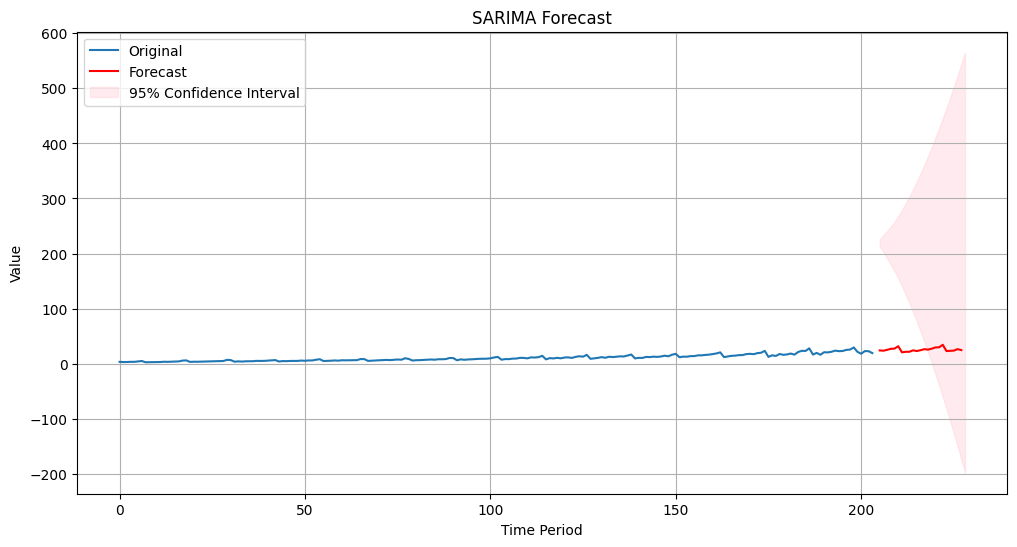

In [12]:
# Forecast
# initialize number of periods as 24
n_periods = 24


# predict the series
forecast = sarima_model.predict(n_periods=n_periods)

# initialize indexes of forecast data
forecast_index = pd.RangeIndex(
    start=len(df) + 1,
    stop=len(df) + n_periods + 1
)

# make series for plotting purpose

# make pandas series of forecasted data
forecast_series = pd.Series(forecast, index=forecast_index)

# make pandas series of lower series of confidence area
lower_series = pd.Series(conf_int[:, 0], index=forecast_index)

# make pandas series of upper series of confidence area
upper_series = pd.Series(conf_int[:, 1], index=forecast_index)


# Plot
# plot the original dataset
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Original')

# plot the forecasted series
plt.plot(forecast_series, color='red', label='Forecast')

# fill the confidence area
plt.fill_between(
    forecast_index,
    lower_series,
    upper_series,
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

# set the title and show
plt.title('SARIMA Forecast')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


You now have a forecast that accurately reflects the projected seasonal demand trend.

<h2><u>Building SARIMAX Model with exogenous variable</h2></u>

With the autoregressive and moving average components in the model, SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with eXogenous Factors) includes seasonal effects and eXogenous factors. As a result, SARIMAX can be considered a seasonal equivalent model to SARIMA and Auto ARIMA.<br><br>

Another seasonal equivalent model can handle external effects as well as the seasonal pattern. This feature of the model differs from other models. In a time series, the temperature, for example, has seasonal influences, such as being lower in the winter and higher in the summer. Even Nevertheless, due to external variables such as humidity, the temperature in winter rises, and there is a potential of a drop in temperature due to rain. If these factors don't show any cyclic or seasonal behaviour, we can't anticipate their exact value. Other models are unable to handle this type of information.<br><br>

We'll utilise the seasonal index from the traditional seasonal decomposition on the last 36 months of data for demonstration purposes. The sole stipulation for using an exogenous variable is that you must also know the variable's value during the forecast period. Because it repeats every frequency cycle, in this case 12 months, the seasonal index is an excellent exogenous variable. You will see how the model looks if we force the recent seasonality pattern into the training and forecast.

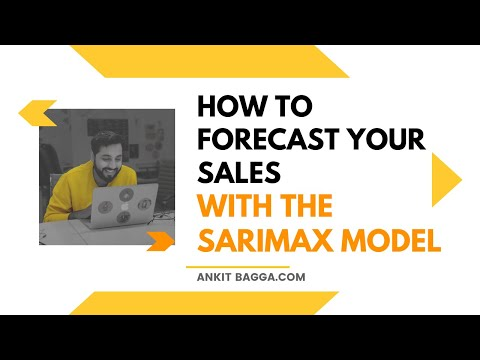

In [13]:
## Refer video
YouTubeVideo('jGcVQNqNqvY', width=700, height=400)

Let's create a SARIMAX model using the drug sales dataset 'a10'. Start by reading and loading the data. Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1sAKHGC9zH2xape1cLqBT4F7NLpT6eq1X/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has two columns date and values. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. index_cols attribute is set to 0 which specifies Column(s) to use as the row labels of the DataFrame, either given as string name or column index.

In [14]:
#get dataset path
path = '/content/a10.csv'

#read data using read_csv
df = pd.read_csv(path)

#plot the data
df = pd.read_csv(path)
df.head()


,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Let's compute the seasonal index so that it can be used in the SARIMAX model as a (exogenous) predictor. Start by importing seasonal_decompose and parse.
* seasonal_decompose: to seperate the seasonal component from the data, https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
* parse: to parse dates i.e. making them uniform, https://dateutil.readthedocs.io/en/stable/parser.html

Next seasonal decompose tha data for last 36 months using the multiplicative model. In the multiplicative model, the original time series is expressed as the product of trend, seasonal and irregular components. Set the extrapolate_trend to freq which uses frequent closest points. https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html. Now get the seasonal index by using the seasonal function on seasonally decomposed data. The seasonal decompose function returns an object with seasonal, trend, and resid attributes. From that we seperate the seasonal component as seasonal index (only last 12 months). Convert this series to dataframe using to_frame method. Next add the month column by first converting the index to datetime and then extracting the months. use 'pd.to_datetime(seasonal_index.index).month'. Add month column to the original drug sales data.Ccreate new dataframe by merging original data and sesonal index and resign the index by setting it to index of the original data.



In [19]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# import parse
from dateutil.parser import parse

# Assuming 'date' column contains dates as strings
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime objects
df.set_index('date', inplace=True)      # Set 'date' column as index

# multiplicative seasonal component
# seasonal decompose the data for last 36 months
result = seasonal_decompose(df['value'][-36:], model='multiplicative', extrapolate_trend='freq')

# get seasonal index
seasonal_index = result.seasonal[-12:].to_frame()
# add the month column in seasonal index
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# ... (rest of the code remains the same)

Check the original data using head function.

In [27]:
# display data
#df=pd.read_csv(path)
df.head()


,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Check the newly created dataframe having seasonal index and original data.



In [25]:
# display new dataset
seasonal_index.head()


,seasonal,month
date,,
2007-07-01,0.970490,7
2007-08-01,1.050900,8
2007-09-01,0.998881,9
2007-10-01,1.059657,10
2007-11-01,1.146141,11


The exogenous variable (seasonal index) is ready. Let’s build the SARIMAX model. Use the same procedure as done in SARIMA only add the exogenous parameter passing the seasonal_index column.

In [26]:
# import pmdarima
import pmdarima as pm


# create SARIMAX Model (
sarimax_model = pm.auto_arima(
    df['value'],
    start_p=1,
    start_q=1,
    test='adf',
    max_p=3,
    max_q=3,
    m=12,
    d=None,
    seasonal=True,
    start_P=0,
    D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    exogenous=seasonal_index['month']
)

# pass sales values and exogenous data
# set start_p,start_q
# use adf test
# set max_p,max_q,m
# set start_P,seasonal as True
# set d,D,trace as True
# ignore the errors
# suppress the warnings
# set stepwise to True )

# print model summary
print(sarimax_model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.88 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.483, Time=2.14 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=4.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=531.168, Time=1.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=534.757, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,1,2)[12] intercept   : AIC=524.201, Time=2.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,2)[12] intercept   : AIC=533.034, Time=4.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,1)[12] intercept   : AIC=531.805, Time=5.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,2)[12] intercept   : AIC=545.610, Time=2.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=2.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=528.342, Time=3.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=593.876, Time=2.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,2)[12] intercept   : AIC=523.920, Time=4.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=532.804, Time=1.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,2)[12] intercept   : AIC=534.472, Time=2.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=531.170, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,1)[12] intercept   : AIC=532.815, Time=5.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,1,2)[12] intercept   : AIC=583.617, Time=1.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(1,1,2)[12] intercept   : AIC=inf, Time=2.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=614.924, Time=1.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,1,2)[12] intercept   : AIC=566.118, Time=2.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(1,1,2)[12] intercept   : AIC=527.281, Time=4.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,2)[12]             : AIC=524.136, Time=3.01 sec

Best model:  ARIMA(1,0,2)(1,1,2)[12] intercept
Total fit time: 70.289 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.960
Date:                            Mon, 28 Apr 2025   AIC                            523.920
Time:                                    22:27:02   BIC                            549.980
Sample:                                         0   HQIC                           534.475
                                            - 204                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

Best model:  ARIMA(2,0,1)(1,1,2)[12]     

Instead of the complete history, we have basically forced the most recent seasonal effect of the last three years into the model.

Let's look ahead for the next 24 months. For this, you'll need the seasonal index's value for the next 24 months.
Predict the data using predict function passing the number of periods. Also pass exogenous parameter as tiled and reshaped version of seasonal_index. Tile creates an array by repeating the original data by specified number of times. https://numpy.org/doc/stable/reference/generated/numpy.tile.html. Arrange the indexes for the forecasted data starting from the length of original data upto the extended number of periods. Let the frequency be 'MS'. Refer:https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases. Next make the pandas series for forecasted data, lower and upper series of confidence area. Next plot the data,forecasted data and confidence area.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


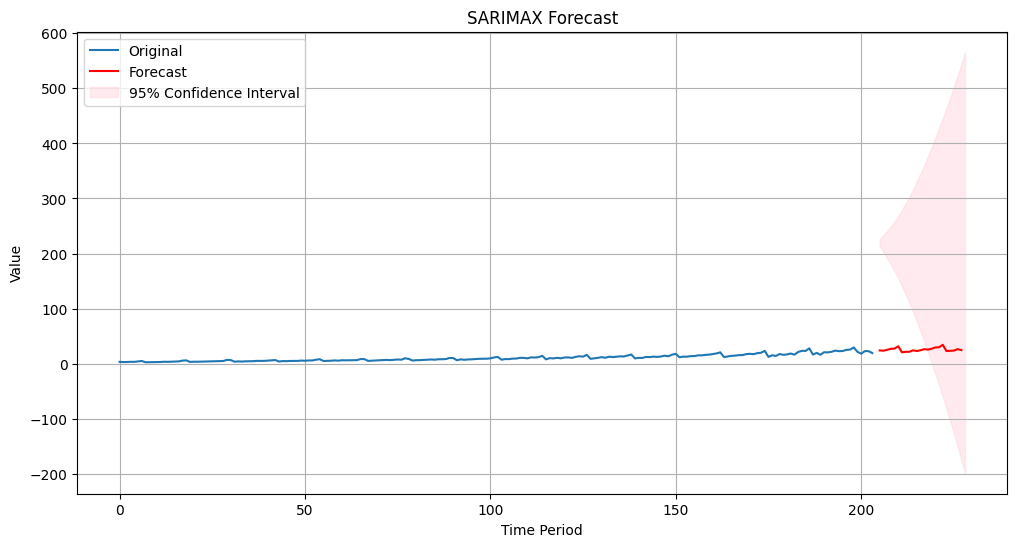

In [28]:
# Forecast
# initialize number of periods as 24
model = sarimax_model
n_periods = 24

# predict the series
forecast = model.predict(n_periods=n_periods, exogenous=np.tile(seasonal_index['month'].values, (n_periods, 1)).T)

# initialize indexes of forecast data
forecast_index = pd.RangeIndex(
    start=len(df) + 1,
    stop=len(df) + n_periods + 1
)


# make series for plotting purpose
# make pandas series of forecasted data
forecast_series = pd.Series(forecast, index=forecast_index)

# make pandas series of lower series of confidence area
lower_series = pd.Series(conf_int[:, 0], index=forecast_index)

# make pandas series of upper series of confidence area
upper_series = pd.Series(conf_int[:, 1], index=forecast_index)


# Plot
# plot the values column of original data
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Original')

# plot the forecasted series
plt.plot(forecast_series, color='red', label='Forecast')

# fill the confidence area
plt.fill_between(
    forecast_index,
    lower_series,
    upper_series,
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

# set the title and show
plt.title('SARIMAX Forecast')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



Hence we have forecasted the series for 24 months by considering exogenous factors.

In this assignment,Specifically, you learned:

* How to automatically build ARIMA model
* Building SARIMA and SARIMAX models


Keep practising until next assignment comes in. <br><br>

## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br> See you then!!

![](https://c.tenor.com/MK3U9VAdNq4AAAAC/talk-soon-talk-to-you-soon.gif)